In [1]:
# Check the versions of libraries
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.2 (default, Dec 21 2020, 15:06:04) 
[Clang 12.0.0 (clang-1200.0.32.29)]
scipy: 1.7.2
numpy: 1.21.4
matplotlib: 3.4.3
pandas: 1.3.4
sklearn: 1.0.1


In [5]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Loaddataset
url= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names=['sepal-length','sepal-width','petal-length', 'petal-width', 'class']
dataset=read_csv(url,names=names)

In [67]:
# shape
print(dataset.shape)

(150, 5)


In [72]:
#head
print(dataset.head(60))

    sepal-length  sepal-width  petal-length  petal-width            class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
5            5.4          3.9           1.7          0.4      Iris-setosa
6            4.6          3.4           1.4          0.3      Iris-setosa
7            5.0          3.4           1.5          0.2      Iris-setosa
8            4.4          2.9           1.4          0.2      Iris-setosa
9            4.9          3.1           1.5          0.1      Iris-setosa
10           5.4          3.7           1.5          0.2      Iris-setosa
11           4.8          3.4           1.6          0.2      Iris-setosa
12           4.8          3.0         

In [19]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [20]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


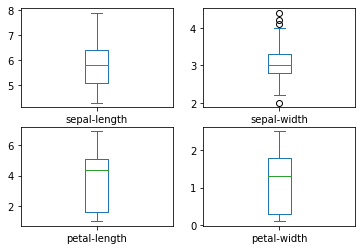

In [34]:

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

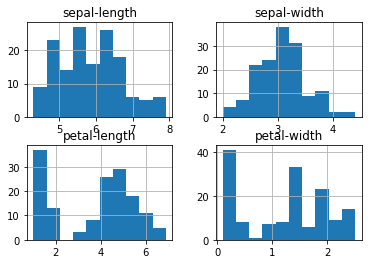

In [33]:
dataset.hist()
pyplot.show()

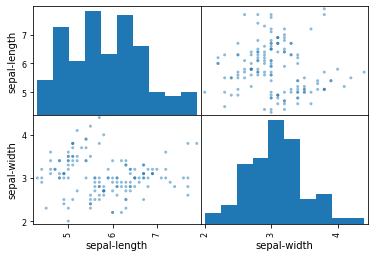

In [40]:
# scatter plot matrix
'''
A scatter plot matrix is a grid 
(or matrix) of scatter plots used to 
visualize bivariate relationships between 
combinations of variables. Each scatter plot 
in the matrix visualizes the relationship 
between a pair of variables, allowing many 
relationships to be explored in one chart.
'''
#scatter_matrix(dataset)
#pyplot.show()

scatter_matrix(dataset.iloc[:, 0:2] )
pyplot.show()

In [89]:
#Split-out validation dataset
array = dataset.values
X = array[:,0:4]
print('X:',X.shape)
#print(X.view())
y = array[:,4]
print('Y:',y.shape)
#print(y.view())

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

print('X_train:',     X_train.shape)
print('X_validation', X_validation.shape)
print('Y_train',      Y_train.shape)
print('Y_validation', Y_validation.shape)

X: (150, 4)
Y: (150,)
X_train: (120, 4)
X_validation (30, 4)
Y_train (120,)
Y_validation (30,)


In [90]:
# Spot Check Algorithms
models = []
models.append(('LR',   LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA',  LinearDiscriminantAnalysis()))
models.append(('KNN',  KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',   GaussianNB()))
models.append(('SVM',  SVC(gamma='auto')))
# evaluate each model in turn
results = []
names   = []
print('algo    mean       std   ')
for name, model in models:
    #k-fold cross-validation
    #This will split our dataset into 10 parts, train on 9 and test on 1 
    #and repeat for all combinations of train-test splits.
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    
    names.append(name)
    
    print('%s:   %f    (%f)' % (name, cv_results.mean(), cv_results.std()))


algo    mean       std   
LR:   0.941667    (0.065085)
LDA:   0.975000    (0.038188)
KNN:   0.958333    (0.041667)
CART:   0.933333    (0.050000)
NB:   0.950000    (0.055277)
SVM:   0.983333    (0.033333)


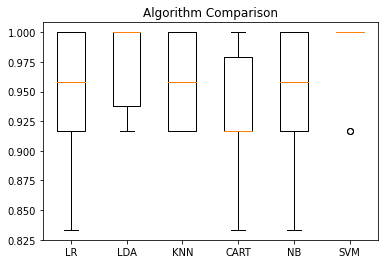

In [91]:
#Compare Algorithms 
pyplot.boxplot(results, labels=names) 
pyplot.title('Algorithm Comparison') 
pyplot.show()

In [92]:
# Spot Check Algorithms
models = []
LR   = LogisticRegression(solver = 'liblinear', multi_class='ovr')
LDA  = LinearDiscriminantAnalysis()
KNN  = KNeighborsClassifier()
CART = DecisionTreeClassifier()
NB   = GaussianNB()
SVM  = SVC(gamma='auto')
# evaluate each model in turn
results = []
names   = ['LR','LDA','KNN','CART','NB','SVM']

print('algo    mean       std   ')

#k-fold cross-validation
#This will split our dataset into 10 parts, train on 9 and test on 1 
#and repeat for all combinations of train-test splits.

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

#LogisticRegression(LR)
cv_results = cross_val_score(LR, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('LR', cv_results.mean(), cv_results.std()))

#Linear Discriminant Analysis (LDA)
cv_results = cross_val_score(LDA, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('LDA', cv_results.mean(), cv_results.std()))

#K-Nearest Neighbors (KNN)
cv_results = cross_val_score(KNN, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('KNN', cv_results.mean(), cv_results.std()))

#Classification and Regression Trees (CART)
cv_results = cross_val_score(CART, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('CART', cv_results.mean(), cv_results.std()))

#Gaussian Naive Bayes (NB)
cv_results = cross_val_score(NB, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('NB', cv_results.mean(), cv_results.std()))

#Support Vector Machines (SVM)
cv_results = cross_val_score(SVM, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
print('%s:   %f    (%f)' % ('SVM', cv_results.mean(), cv_results.std()))



algo    mean       std   
LR:   0.941667    (0.065085)
LDA:   0.975000    (0.038188)
KNN:   0.958333    (0.041667)
CART:   0.950000    (0.055277)
NB:   0.950000    (0.055277)
SVM:   0.983333    (0.033333)


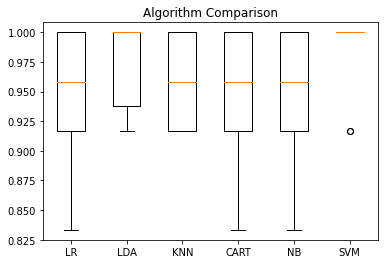

In [93]:
#Compare Algorithms 
pyplot.boxplot(results, labels=names) 
pyplot.title('Algorithm Comparison') 
pyplot.show()

In [155]:
# Make predictions on validation dataset 
#fit the model on the entire training dataset
#and make predictions on the validation dataset.

model = SVC(gamma='auto') 

model.fit(X_train, Y_train)

predictions = model.predict(X_validation)


print('X_train:',     X_train.shape)
print('X_validation', X_validation.shape)
print('Y_train',      Y_train.shape)
print('Y_validation', Y_validation.shape)
print('predictions',  predictions.shape)


# Evaluate predictions
print(accuracy_score(Y_validation, predictions))

print(confusion_matrix(Y_validation, predictions , labels=['Iris-setosa','Iris-versicolor','Iris-virginica'] ))

print(classification_report( Y_validation, predictions))


#print(confusion_matrix(Y_validation, predictions , labels=['Iris-setosa'] ))
#print(confusion_matrix(Y_validation, predictions , labels=['Iris-versicolor'] ))
#print(confusion_matrix(Y_validation, predictions , labels=['Iris-virginica'] ))

X_train: (120, 4)
X_validation (30, 4)
Y_train (120,)
Y_validation (30,)
predictions (30,)
0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

